# Exploring Clustering Methods: Using Credit Card Dataset


## Author: Arash Sadeghzadeh


### Data for this notebook can be retrieved from the following URL:

### https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


## Table of Contents

* [Data Exploration](#first-bullet)
* [Data Cleaning](#second-bullet)
    - [Handeling Skewness](#21)
    - [Deleting Outliers](#22)
    - [Handling Null Values](#23)
    - [Handling Duplicate Values](#24)
    - [Applying PCA](#25)
* [Clustering](#third-bullet)
    - [K Means Clustering](#31)
        - [K Means Methos](#311)
        - [Tuning Hyperparameters ](#312)
        - [Representing the Results](#313)
    - [Agglomerative Hierarchical Clustering](#32)
        - [AHC Method](#321)
        - [Tuning Hyperparameters](#322)
        - [Representing the Results](#323)
    - [DBSCAN Clustering](#33)
        - [DBSCAN Method](#331)
        - [Tuning Hyperparameters](#332)
        - [Representing the Results](#333)
    - [Mean Shift Clustering](#34)
        - [Mean Shift Method](#341)
        - [Tuning Hyperparameters](#342)
        - [Representing the Results](#343)
* [Conclusion and Final Results](#fourth-bullet)


In this notebook we will explore different approaches for clustering using the credit card dataset available on kaggle. After initially exploring the dataset to get familiar with the data, we will carry out data cleaning to prepare the data for the clustering task. Handling skewness, deleting outliers, handling null values and duplicate values are amongst the actions that we will perform to clean our data. Afterwards, we consider the clustering problem. K Mean, Agglomerative Hierarchical, DBSCAN, and Mean Shift clustering are applied on our data. Finally, we have drawn some conclusion and results. 


## Data Exploration <a class="anchor" id="first-bullet"></a>

First, let us import the required libraries.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

Now, we load the data. The data is available at the following URL:
    https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [3]:
data = pd.read_csv('./CC GENERAL.csv')

Lets have a look at some rows of the dataset:

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


As one can easily see, teh dataset has 18 features with about 9000 samples.

In [5]:
data.shape

(8950, 18)

Now, we can see the data types of the features:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Lets have a copy of the data for the later use:

In [7]:
data_raw = data.copy()

In the following, we investigate the number of different values in all features to understand whether there exist any binary features or not. Furthermore, to decide which features are redundant and can be deleted.

In [8]:
unique_dict = dict()
for col in data.columns:
    unique_dict[col] = data[col].value_counts().count()

pd.Series(unique_dict).to_frame().rename(columns={0: 'Numebr of unique values'})

,Numebr of unique values
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


As one can see, we do not have any binary features. Furthermore, for each sample we have a CUST_ID which can be omitted wihtout losing any information. 

In [9]:
data.drop(columns=['CUST_ID'], axis=1, inplace=True)

In what follows, let's have a look at the pairwise correlation of columns:

In [10]:
data.corr().T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


The descriptive statistics of our dataset is as follows:

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Using histograms, one can see the distributions of the features in our dataset:

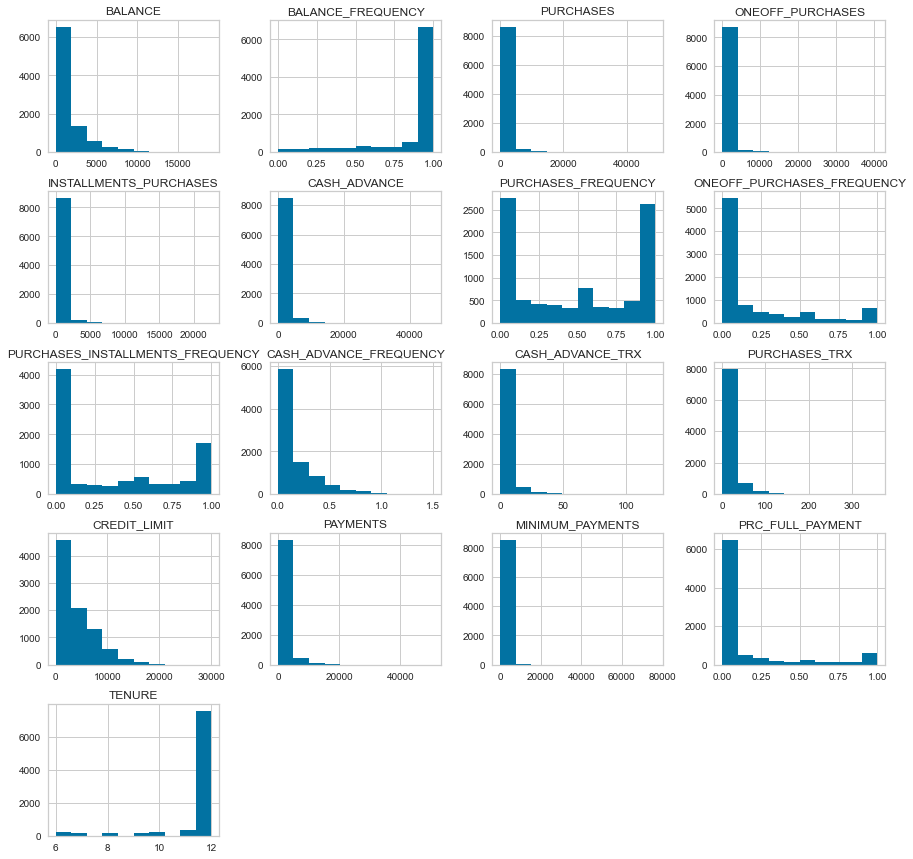

In [12]:
_, ax = plt.subplots(1,1, figsize=(15,15))
data.hist(ax=ax)
plt.show()

## Data Cleaning <a class="anchor" id="second-bullet"></a>

Now that we have have got familiar with the dataset, it is time to clean the data to tackle our problem:

### Handeling Skewness  <a class="anchor" id="21"></a>

As the first step to clean our data, lets investigate the skewness of our feature:

<AxesSubplot:>

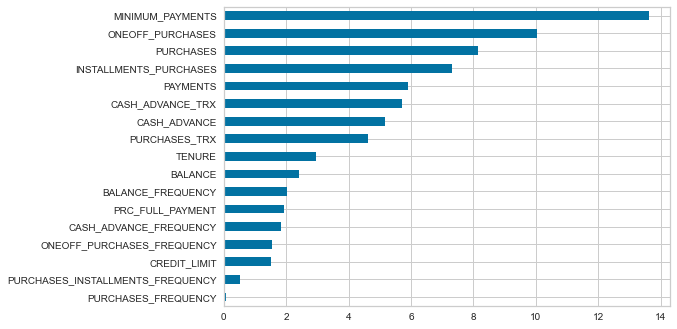

In [13]:
skew_val = data.skew().abs().sort_values()
skew_val.plot.barh()

As one can see, many of our features are highly skewed, and we have to take care of them. Using a log transformation, we can reduce the skewness of the features:

In [14]:
skewed_col = data.columns[skew_val>0.7]

<AxesSubplot:>

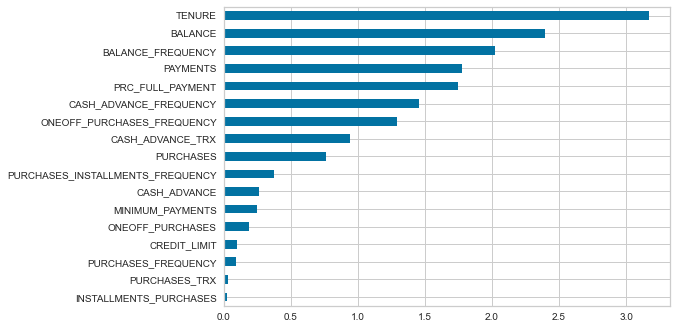

In [15]:
for col in skewed_col:
    data[col] = np.log1p(data[col])
    
skew_val = data.skew().abs().sort_values()
skew_val.plot.barh()

Employing the two barcharts provided above, it can be easily seen that the skewness has been decreases using the proposed transformation.

### Deleting Outliers <a class="anchor" id="22"></a>

In this subsection, we consider inspecting the outliers in our dataset. Using boxplots, we can display the distribution of the dataset and to visually detect the outliers in the dataset. 

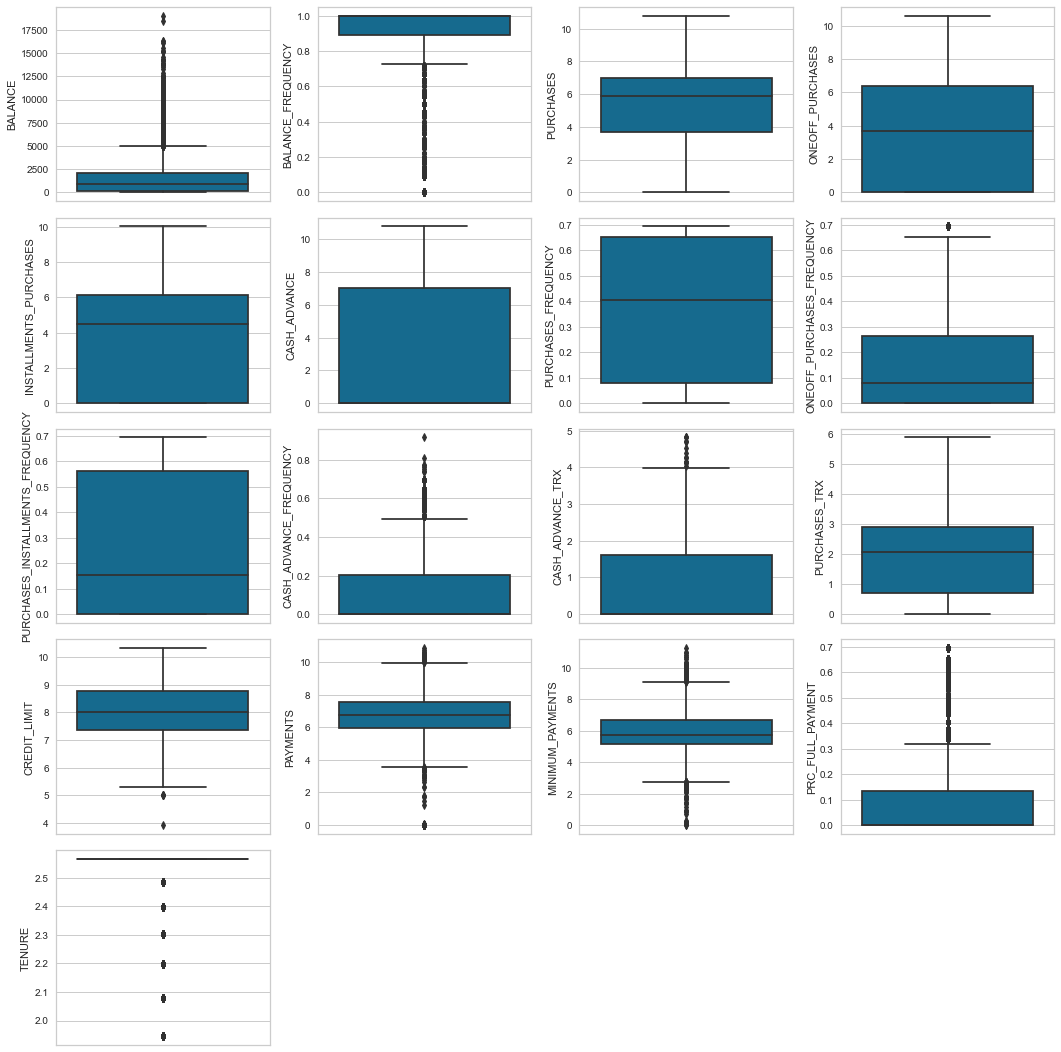

In [16]:
def bar_plot_rep(data):
    _, ax = plt.subplots(5,4, figsize=(15,15))
    for num, col in enumerate(data.columns):
        sns.boxplot(y=col, data=data, ax=ax.ravel()[num])
    
    plt.tight_layout()
    ax.ravel()[17].axis('off'), ax.ravel()[18].axis('off'), ax.ravel()[19].axis('off')
    plt.show()
    
bar_plot_rep(data)

We consider z-core=5 as a limit to delete the outliers in our dataset.

In [17]:
SScaler = StandardScaler()
data_scaled = SScaler.fit_transform(data)
mask = np.all(np.abs(data_scaled) < 5, axis=1)

data_del_outliers = data[mask]
data = data_del_outliers
data.shape

(8605, 17)

This way, about 400 samples have been deleted from the dataset.

### Handling Null Values <a class="anchor" id="23"></a>

Let's again have a look at the features to see whether there exist any null values in our dataset.

In [18]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8605 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8605 non-null   float64
 1   BALANCE_FREQUENCY                 8605 non-null   float64
 2   PURCHASES                         8605 non-null   float64
 3   ONEOFF_PURCHASES                  8605 non-null   float64
 4   INSTALLMENTS_PURCHASES            8605 non-null   float64
 5   CASH_ADVANCE                      8605 non-null   float64
 6   PURCHASES_FREQUENCY               8605 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8605 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8605 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8605 non-null   float64
 10  CASH_ADVANCE_TRX                  8605 non-null   float64
 11  PURCHASES_TRX                     8605 non-null   float64
 12  CREDIT

Obviousely, we do not have any null values in the dataset.

### Handling Duplicate Values <a class="anchor" id="24"></a>

Finally, as it is revealed in the following, no duplicate values exist in our dataset.

In [19]:
# check whether there exist duplicate values
data.duplicated().sum()

0

### Applying PCA <a class="anchor" id="25"></a>

We consider PCA to reduce the dimension to improve the clustering performance. Suppose that we want to preserve 90 percent of the variance.  To do so, it is enough to consider 5 components in the PCA and 6 components in the PCA with Kernel, as it becomes clear below. 

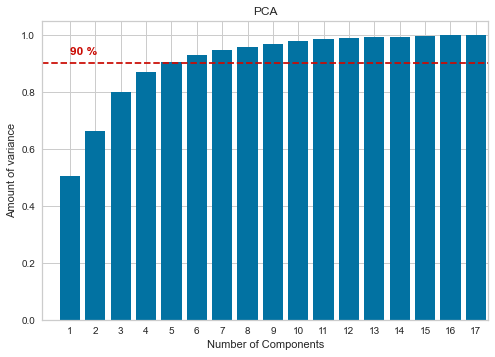

In [20]:
max_abs_scal = MaxAbsScaler()
pca = PCA(n_components=17, random_state=1979)

data_sca = max_abs_scal.fit_transform(data)
data_sca_tra = pca.fit_transform(data_sca)

res = pca.explained_variance_ratio_
plt.bar(x=np.arange(1,18), height=np.cumsum(res))
plt.text(1,0.93, '90 %', fontweight='bold', color='r')
plt.plot([-0.1, 17.5], [0.90,0.90], 'r--')
ax = plt.gca()
ax.set(xticks=np.arange(1,18), xlabel='Number of Components', ylabel='Amount of variance', title='PCA', xlim=[-0.1, 17.5])
plt.show()

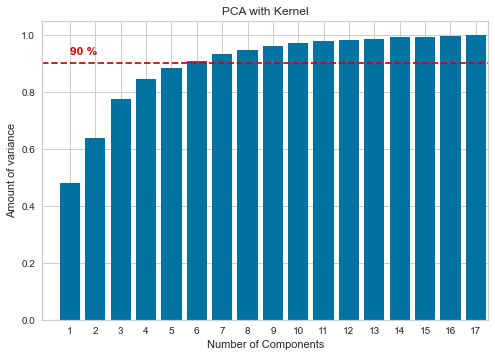

In [21]:
max_abs_scal = MaxAbsScaler()
kern_pca = KernelPCA(n_components=17, n_jobs=-1, kernel='rbf', random_state=1979)

data_sca = max_abs_scal.fit_transform(data)
data_sca_tra = kern_pca.fit_transform(data_sca)

explained_variance = np.var(data_sca_tra, axis=0)
res = explained_variance / np.sum(explained_variance)

plt.bar(x=np.arange(1,18), height=np.cumsum(res))


plt.text(1,0.93, '90 %', fontweight='bold', color='r')
plt.plot([-0.1, 17.5], [0.90,0.90], 'r--')
ax = plt.gca()
ax.set(xticks=np.arange(1,18), xlabel='Number of Components', ylabel='Amount of variance', title='PCA with Kernel', xlim=[-0.1, 17.5])
plt.show()

## Clustering  <a class="anchor" id="third-bullet"></a>

Now that the data have been cleaned and prepared, we can apply the clustering methods on our data. In this section, we will apply four different methods on our dataset to cluster the data. Afterwards, we will compare the results to decide which approach results in a better clustering for our dataset. 

### K Means Clustering <a class="anchor" id="31"></a>

The first clustering method that we will consider for our dataset is the K Means Clustering approach. 

#### K Means Method <a class="anchor" id="311"></a>

In [22]:
def kmean_clusterer(X, num_clus, random_state=1979, scaler=None, trans=None):
    '''Perform K mean cluster'''
    
    if scaler:
        data_sca = scaler.fit_transform(X)
    else:
        data_sca = X
    
    if trans:
        data_sca_tra = trans.fit_transform(data_sca)
    else:
        data_sca_tra = data_sca
    
    kmean_clus = KMeans(n_clusters=num_clus, random_state=random_state, max_iter=1000)
    kmean_clus.fit(X=data_sca_tra)
    
    labels = kmean_clus.labels_
    sil_score = silhouette_score(X=data_sca_tra, labels=labels)
    
    
    return labels, kmean_clus.inertia_, sil_score, kmean_clus, data_sca_tra

#### Tuning Hyperparameters <a class="anchor" id="312"></a>

In this section, we will consider tuning the related hyperparameters. First, let us investigate the impact of different scalers on the obtained results. To numerically evaluate the results, we will use Silhouette score. 

In [23]:
min_max_scal = MinMaxScaler()
stan_scal = StandardScaler()
max_abs_scal = MaxAbsScaler()
rob_scal = RobustScaler()
scalers = [min_max_scal, stan_scal, max_abs_scal, rob_scal]

kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf', random_state=1979)
pca = PCA(n_components=5, random_state=1979)
transformers = [pca, kern_pca]

# Test Different Scalers, with num_clus=4, trans=pca
res_scaler = list()

for scaler in tqdm(scalers):
    labels, inertia,  sil_score, kmean_clus, data_sca_tra = kmean_clusterer(X=data,
                                                                            num_clus=4, 
                                                                            random_state=1979, 
                                                                            scaler=scaler, 
                                                                            trans=pca)
    res_scaler.append(pd.Series({'Inertia': inertia, 'Silhoutte Score': sil_score}, name=scaler))

pd.concat(res_scaler, axis=1)

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]


,MinMaxScaler(),StandardScaler(),MaxAbsScaler(),RobustScaler()
Inertia,3271.488124,54758.818767,3173.971512,37593.976336
Silhoutte Score,0.337972,0.269859,0.345371,0.339659


From the above table, MaxAbsScaler() provides better results for our dataset.

Now, let us investigate the impact of different transformers, PCA and PCA with kernel, on the obtained results.

In [24]:
max_abs_scal = MaxAbsScaler()

kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf', random_state=1979)
pca = PCA(n_components=5, random_state=1979)

transformers = [('No Dimension Reduction', None), ('PCA', pca), ('PCA with Kernel', kern_pca)]

# Test Different transformers, with num_clus=4, scaler=MaxAbsScale()
res_transformer = list()

for trans in tqdm(transformers):
    labels, inertia,  sil_score, kmean_clus, data_sca_tra = kmean_clusterer(X=data,
                                                                            num_clus=4, 
                                                                            random_state=1979, 
                                                                            scaler=MaxAbsScaler(), 
                                                                            trans=trans[1])
    res_transformer.append(pd.Series({'Inertia': inertia, 'Silhoutte Score': sil_score}, name=trans[0]))

pd.concat(res_transformer, axis=1)

100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.22s/it]


,No Dimension Reduction,PCA,PCA with Kernel
Inertia,4036.789105,3173.971512,343.862769
Silhoutte Score,0.300557,0.345371,0.344462


Clearly, PCA  provides better results for our dataset.

Now, let us tune the number of clusters using the elbow method.

100%|███████████████████████████████████████████| 13/13 [00:11<00:00,  1.13it/s]


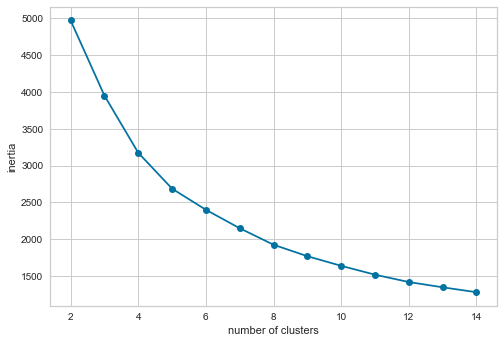

In [25]:
res_num_clus = list()
kmean_clus_list = list()
data_sca_tra_list =list()

for n in tqdm(range(2,15)):
    labels, inertia,  sil_score, kmean_clus, data_sca_tra = kmean_clusterer(X=data,
                                                                            num_clus=n, 
                                                                            random_state=1979, 
                                                                            scaler=MaxAbsScaler(), 
                                                                            trans=pca)
    res_num_clus.append(inertia)
    kmean_clus_list.append(kmean_clus)
    data_sca_tra_list.append(data_sca_tra)

plt.plot(range(2,15), res_num_clus, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()    

Based on the above figure, it is not very clear which number of clusters is more appropriate. However, 4, 5, or 6 may seem more rational. 

#### Representing the Results <a class="anchor" id="313"></a>

To decide about the suitable number of clusters, let us use Silhouette Plot and TSNE for visualizing our high-dimensional data. 

In [26]:
pca = PCA(n_components=5, random_state=1979)
kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf', random_state=1979)

def rep_kmeans(num, ax1, ax2):
    colors = sns.color_palette(n_colors=num)

    labels, inertia,  sil_score, kmean_clus, data_sca_tra = kmean_clusterer(X=data, num_clus=num, random_state=1979, 
                                                                            scaler=MaxAbsScaler(), trans=kern_pca)

    tsne = TSNE(n_components=2, learning_rate='auto', random_state=58).fit_transform(data_sca_tra)
    sns.scatterplot(tsne[:,0], tsne[:,1] , s=15, hue=labels, palette=colors, ax=ax1)

    model = SilhouetteVisualizer(estimator=kmean_clus, X=data_sca_tra, colors=colors, ax=ax2) 
    model.fit(data_sca_tra)
    model.show()
    plt.show()
    print('Silhoutte Score: {}'.format(sil_score))

In what follows, we first impose k=3 as the number of clusters in the K Means method.

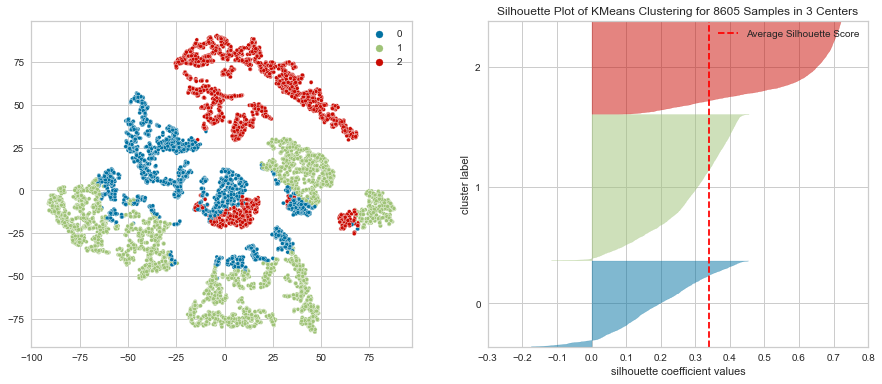

Silhoutte Score: 0.3392628915878402


In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
rep_kmeans(3, axs[0], axs[1])

Now, we consider k=4 as the number of clusters:

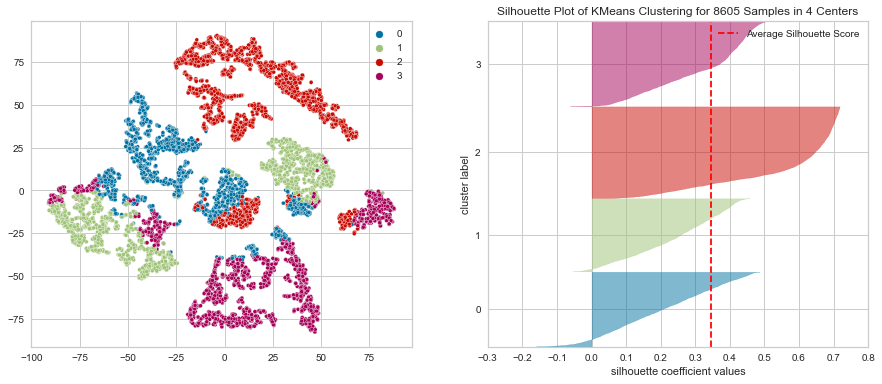

Silhoutte Score: 0.3444619551492673


In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
rep_kmeans(4, axs[0], axs[1])

Below, you can see the results regarding k=5.

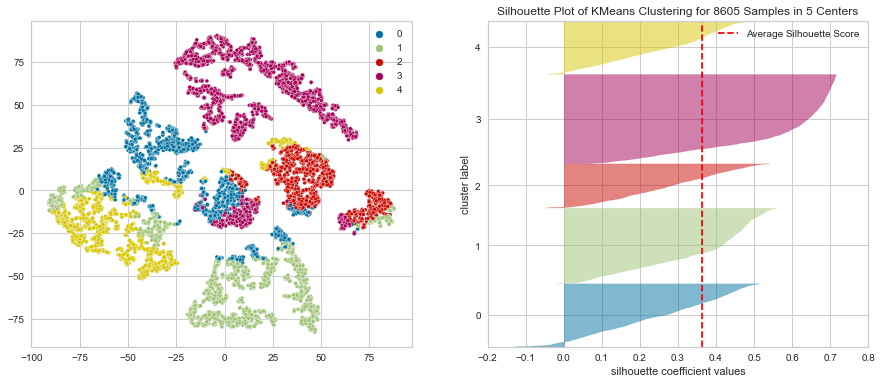

Silhoutte Score: 0.3630903143040201


In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
rep_kmeans(5, axs[0], axs[1])

Finally, we consider k=6.

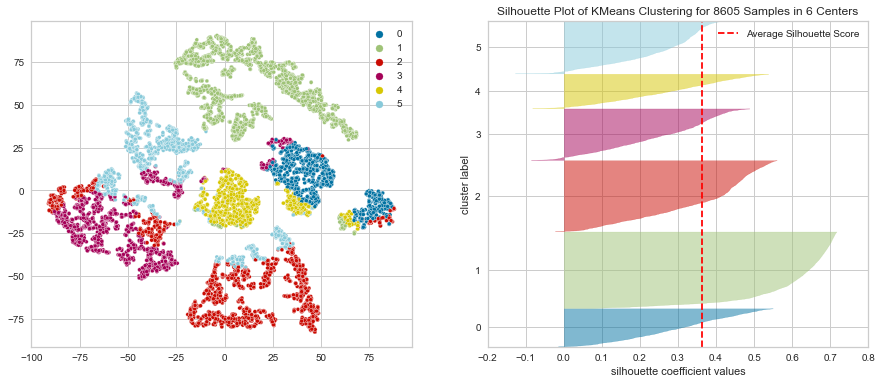

Silhoutte Score: 0.3628941595302515


In [30]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
rep_kmeans(6, axs[0], axs[1])

Based on the Silhouette and TSNE plots, it seems that k=4 is the best one. Note that a good number of clusters is the one for which the clusters do not lie below the average silhouette score and the clusters do not have wide fluctuations in the size. 

### Agglomerative Hierarchical Clustering <a class="anchor" id="32"></a>

As another method, we consider applying Agglomerative Hierarchical Clustering (AHC) on our dataset for our clustering problem. 

#### AHC Method <a class="anchor" id="321"></a>

In [31]:
def agglomerative_clusterer(X, random_state=1979, scaler=None, trans=None):
    
    if scaler:
        data_sca = scaler.fit_transform(X)
    else:
        data_sca = X
    
    if trans:
        data_sca_tra = trans.fit_transform(data_sca)
    else:
        data_sca_tra = data_sca
    
    agg_clus = AgglomerativeClustering(n_clusters=4)
    agg_clus.fit(X=data_sca)
    labels = agg_clus.labels_
    sil_score = silhouette_score(X=data_sca_tra, labels=labels)
    
    return labels, sil_score, agg_clus, data_sca_tra

#### Tuning Hyperparameters <a class="anchor" id="322"></a>

In what follows, we will investigate tuning the hyperparametrs for AHC. 

In [32]:
min_max_scal = MinMaxScaler()
stan_scal = StandardScaler()
max_abs_scal = MaxAbsScaler()
rob_scal = RobustScaler()
scalers = [min_max_scal, stan_scal, max_abs_scal, rob_scal]

kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf', random_state=1979)
pca = PCA(n_components=5, random_state=1979)

transformers = [pca, kern_pca]

total_dict = dict()

for scaler in scalers:
    res_list = list()
    for trans in transformers:
        labels, sil_score, agg_clus, data_sca_tra = agglomerative_clusterer(data, 
                                                                            random_state=1979, 
                                                                            scaler=scaler,
                                                                            trans=trans)
        res_list.append(sil_score)
    total_dict[scaler] = res_list    

In [33]:
pd.DataFrame(total_dict, index=['PCA', 'PCA with Kernel'])

,MinMaxScaler(),StandardScaler(),MaxAbsScaler(),RobustScaler()
PCA,0.291233,0.186982,0.308208,0.292136
PCA with Kernel,0.283458,0.202088,0.312057,0.302352


Obviousely, a combination of MaxAbsScaler() and PCA with Kernel lead to the best result.

As it is revealed, also AHC provides 4 clusters for our dataset.

In [34]:
data_sca = max_abs_scal.fit_transform(data)

labels, sil_score, agg_clus, data_sca_tra = agglomerative_clusterer(data, random_state=1979, 
                                                                    scaler=max_abs_scal, trans=kern_pca)

print('Number of clusters: {}'.format(agg_clus.n_clusters))
print('Silhouette Score: {}'.format(round(sil_score, 4)))

Number of clusters: 4
Silhouette Score: 0.3121


#### Representing the Results <a class="anchor" id="323"></a>

To have a clearer insight on the performance of the AHC, one can use TSNE to visualize the obtained result.

<AxesSubplot:>

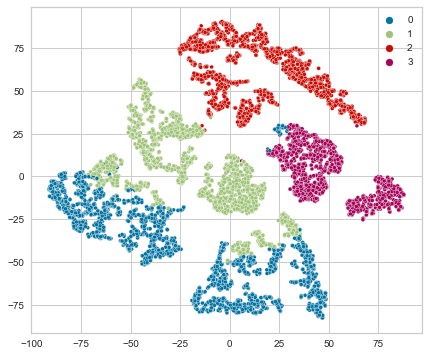

In [35]:
fig, axs = plt.subplots(1,1, figsize=(7,6))
colors = sns.color_palette(n_colors=4)

labels, sil_score, agg_clus, data_sca_tra = agglomerative_clusterer(X=data, random_state=1979, 
                                                                    scaler=MaxAbsScaler(), trans=kern_pca) 

tsne = TSNE(n_components=2, learning_rate='auto', random_state=58).fit_transform(data_sca_tra)
sns.scatterplot(tsne[:,0], tsne[:,1] , s=15, hue=labels, palette=colors, ax=axs)

### DBSCAN Clustering <a class="anchor" id="33"></a>

The third method that we will consider is the DBSCAN clustering method. 

#### DBSCAN Method  <a class="anchor" id="331"></a>

In [36]:
def dbscan_clusterer(X, eps, random_state=1979, min_samples=10, scaler=None, trans=None):
    
    if scaler:
        data_sca = scaler.fit_transform(X)
    else:
        data_sca = X
    
    if trans:
        data_sca_tra = trans.fit_transform(data_sca)
    else:
        data_sca_tra = data_sca
        
    dbscan_clus = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = dbscan_clus.fit_predict(data_sca_tra)
    
    try:
        sil_score = silhouette_score(X=data_sca_tra, labels=labels, random_state=random_state)
    except:
        sil_score = np.nan
    
    return labels, sil_score, dbscan_clus, data_sca_tra
    

#### Tuning Hyperparameters <a class="anchor" id="332"></a>

In this section, we tackle the problem of tuning the hyperparameters for DBSCAN method. We consider tuning the epsilon and min_sample hyperparameters for the DBSCAN method. In what follows, one can see the obtained Silhouette scores for different values of min_sample and eps. We have considered MaxAbsScaler() as the scaler and PCA with Kernel to reduce the dimension.

In [37]:
min_max_scal = MinMaxScaler()
stan_scal = StandardScaler()
max_abs_scal = MaxAbsScaler()
rob_scal = RobustScaler()
scalers = [min_max_scal, stan_scal, max_abs_scal, rob_scal]

kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf', random_state=1979)
pca = PCA(n_components=5, random_state=1979)
transformers = [pca, kern_pca]

min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10]
epsilons = np.geomspace(0.01,0.2,50, endpoint=True)

df_res = pd.DataFrame(columns=['Min Sample','epsilon', 'Silhoutte Score', 'No. Classes'])

for eps in epsilons:
    res_list = list()
    for sample in min_samples:
        labels, sil_score, dbscan_clus, data_sca_tra = dbscan_clusterer(X=data, random_state=1979, eps=eps,
                                                                        min_samples=sample, scaler=MaxAbsScaler(), trans=kern_pca)
        
        new_row = {'Min Sample':sample, 'epsilon':eps, 'Silhoutte Score':sil_score, 
                   'No. Classes':len(np.unique(labels)), 'Samples in classes': np.unique(labels,return_counts=True)[1]}
         
        df_res = df_res.append(new_row, ignore_index = True)   


Lets have a look at the obtained results. As one can see in the 'Samples in classes', there exist often some small groups which can be ignored or considered as noise. This way, we can obtain reasonable results by DBSCAN.

In [38]:
df_res.head()

,Min Sample,epsilon,Silhoutte Score,No. Classes,Samples in classes
0,2,0.01,-0.519010,432,"[5719, 5, 5, 2, 160, 1194, 44, 2, 7, 2, 62, 10..."
1,3,0.01,-0.536910,164,"[6255, 5, 5, 160, 1194, 44, 7, 62, 10, 6, 3, 5..."
2,4,0.01,-0.436016,80,"[6562, 5, 160, 1185, 34, 61, 8, 50, 26, 43, 5,..."
3,5,0.01,-0.459838,59,"[6729, 157, 1161, 45, 8, 21, 26, 42, 16, 19, 7..."
4,6,0.01,-0.466794,41,"[6873, 153, 1159, 18, 18, 41, 13, 21, 21, 18, ..."


#### Representing the Results <a class="anchor" id="333"></a>

Now, suppose that those classes having less than 200 samples (about 25 of the samples) are ignored. In what follows, using TSNE you can see the obtained results. Note that class -1 is also the noise class deifned by DBSCAN algorithm.

Lets, first, add a new column as 'No, True classes' which represent the number of classes after ignoring the enough small classes.

In [39]:
df_res['No. True classes'] = df_res['Samples in classes'].apply(lambda x: (x>200).sum())
df_res.head()

,Min Sample,epsilon,Silhoutte Score,No. Classes,Samples in classes,No. True classes
0,2,0.01,-0.519010,432,"[5719, 5, 5, 2, 160, 1194, 44, 2, 7, 2, 62, 10...",2
1,3,0.01,-0.536910,164,"[6255, 5, 5, 160, 1194, 44, 7, 62, 10, 6, 3, 5...",2
2,4,0.01,-0.436016,80,"[6562, 5, 160, 1185, 34, 61, 8, 50, 26, 43, 5,...",2
3,5,0.01,-0.459838,59,"[6729, 157, 1161, 45, 8, 21, 26, 42, 16, 19, 7...",2
4,6,0.01,-0.466794,41,"[6873, 153, 1159, 18, 18, 41, 13, 21, 21, 18, ...",2


Using the following function, one can obtain some reasonable results using DBSCAN. The results are visualized using TSNE.

In [40]:
def rep_DBSCAN_result(NumTrueClasses):
    
    # First we obtain those parameters result in the highest Silhoutte score
    # for a considered NumTrueClasses value
    idx = df_res[df_res['No. True classes']==NumTrueClasses]['Silhoutte Score'].idxmax()
    opt_min_sample = df_res[df_res['No. True classes']==NumTrueClasses].loc[idx]['Min Sample']
    opt_epsilon = df_res[df_res['No. True classes']==NumTrueClasses].loc[idx]['epsilon']
    num_of_colors = df_res[df_res['No. True classes']==NumTrueClasses].loc[idx]['No. Classes']
    print('Optimal min_sample: {}'.format(opt_min_sample))
    print('Optimal epsilon: {}'.format(opt_epsilon))
    
    # Now we apply DBSCAN method for those eps and min_sample values obtained previousely
    labels, sil_score, dbscan_clus, data_sca_tra = dbscan_clusterer(data, random_state=1979, eps=opt_epsilon, 
                                                                min_samples=opt_min_sample, scaler=MaxAbsScaler(),
                                                                trans=kern_pca)
    print('Silhoutte score: {}'.format(sil_score))

    print('Unique Labels: {}'.format(np.unique(labels, return_counts=True)))

    colors = sns.color_palette(n_colors=num_of_colors)
    tsne = TSNE(n_components=2, learning_rate='auto', random_state=58).fit_transform(data_sca_tra)
    sns.scatterplot(tsne[:,0], tsne[:,1] , s=15, palette=colors, hue=labels)
    plt.show()
   

Optimal min_sample: 7
Optimal epsilon: 0.07519758177133438
Silhoutte score: 0.07538618315541194
Unique Labels: (array([-1,  0,  1,  2,  3]), array([ 293, 4337, 3934,   15,   26]))


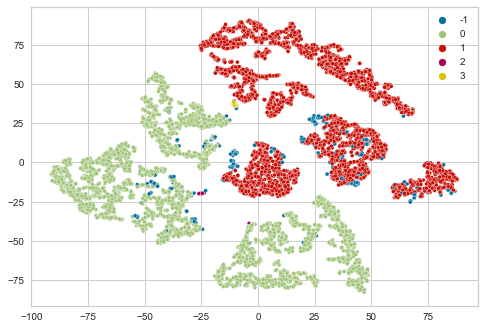

In [41]:
NumTrueClasses = 3
rep_DBSCAN_result(NumTrueClasses)

In the above figure, you can see the related results when NumTrueClasses =3 is considered. Note that class -1 is  also the noise class and we have also considered those classes with few samples as noise in the final results. So, there exist just two classes in the above figure.

Lets also obtain the results considering NumTrueClasses = 5. Note that we also have the noise class. This means that the actual classes here is 4.

Optimal min_sample: 4
Optimal epsilon: 0.06654272925240312
Silhoutte score: 0.005385674598225949
Unique Labels: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 335, 5014, 1936,  406,  849,    6,   13,   27,    4,    7,    4,
          4]))


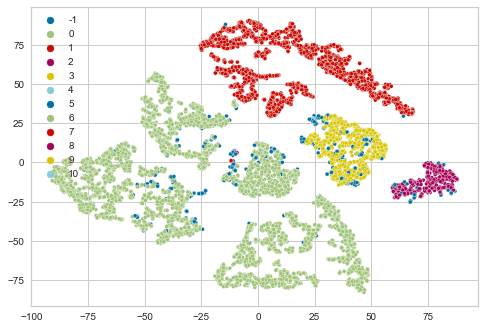

In [42]:
NumTrueClasses = 5
rep_DBSCAN_result(NumTrueClasses)

Finally, we have the results for 5 actual classes conisdering NumTrueClasses=6.

Optimal min_sample: 9
Optimal epsilon: 0.06654272925240312
Silhoutte score: 0.12988261328193162
Unique Labels: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7]), array([ 599, 4167, 1934,  384,  784,  668,   11,   26,   32]))


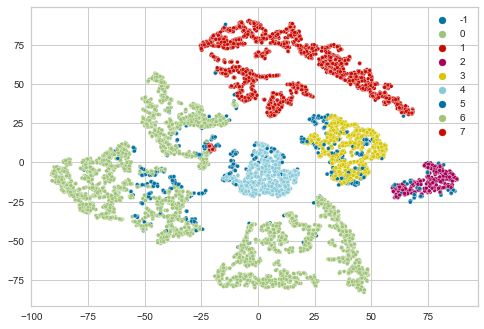

In [43]:
NumTrueClasses = 6
rep_DBSCAN_result(NumTrueClasses)

## Mean Shift Clustering <a class="anchor" id="34"></a>

The last method that we have considered is the Mean Shift Clustering approach.

#### Mean Shift Method <a class="anchor" id="341"></a>

In [44]:
def mean_shift_clusterer(X, random_state=1979, bandwidth=None, scaler=None, trans=None):
    
    if scaler:
        data_sca = scaler.fit_transform(X)
    else:
        data_sca = X
    
    if trans:
        data_sca_tra = trans.fit_transform(data_sca)
    else:
        data_sca_tra = data_sca 
        
    if bandwidth:
        pass
    else:
        bandwidth = estimate_bandwidth(data_sca_tra, quantile=0.3, n_samples=None, random_state=1979, n_jobs=-1)
    
    cluster_centers, labels = mean_shift(X=data_sca_tra, n_jobs=-1, bandwidth=bandwidth)
    
    try:
        sil_score = silhouette_score(X=data_sca_tra, labels=labels)
    except:
        sil_score = np.nan
    
    return labels, sil_score, data_sca_tra

In the following cell, bandwidth is determined by 'estimate_bandwidth' function. 

In [45]:
pca = PCA(n_components=5, random_state=1979)

labels, sil_score, data_sca_tra = mean_shift_clusterer(data, random_state=1979, 
                                                       bandwidth=None, scaler=MaxAbsScaler(), trans=pca)

np.unique(labels, return_counts=True)

(array([0, 1]), array([3947, 4658]))

#### Tuning Hyperparameters <a class="anchor" id="342"></a>

Now, let us tune the hyperparameters to obtain different results. We have preset the scaler as 'MaxAbsScale()'. Then, we will search for the optimal values for bandwidth and transformer (i.e. PCA or KernelPCA). 

In [46]:
pca = PCA(n_components=5, random_state=1979)
kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf')

transformers = [('PCA', pca), ('PCA with Kernel', kern_pca)]

bandwidths = np.geomspace(1e-3,2,50)


res_mean_shift = pd.DataFrame(columns=['bandwidth', 'No. Classes', 'Transformer'])

for trans in transformers:
    for bandwidth in bandwidths:
        labels, sil_score, data_sca_tra = mean_shift_clusterer(data, random_state=1979, 
                                                           bandwidth=bandwidth, scaler=MaxAbsScaler(), trans=trans[1])
        new_row = {'bandwidth':bandwidth, 'Transformer':trans[0], 'No. Classes':len(np.unique(labels)), 'Silhoutte Score':sil_score }
        res_mean_shift = res_mean_shift.append(new_row, ignore_index = True)
        
res_mean_shift.head()

,bandwidth,No. Classes,Transformer,Silhoutte Score
0,0.001000,8605,PCA,NaN
1,0.001168,8605,PCA,NaN
2,0.001364,8602,PCA,0.000541
3,0.001593,8599,PCA,0.001100
4,0.001860,8598,PCA,0.001289


#### Representing the Results <a class="anchor" id="343"></a>

Now lets have a look at the obtained results by Mean Shift Clustering method considering the different values for hyperparameters which in trurn results in different number of clusters.  

In the following, we have chosen the (sub)optimal hyperparameters to obtain three classes for our dataset.

In [47]:
def rep_MeanShift_result(NoClasses):
    idx = res_mean_shift[res_mean_shift['No. Classes']==NoClasses]['Silhoutte Score'].idxmax()
    opt_bandwidth = res_mean_shift[res_mean_shift['No. Classes']==NoClasses].loc[idx,'bandwidth']
    opt_trans = res_mean_shift[res_mean_shift['No. Classes']==NoClasses].loc[idx,'Transformer']

    if opt_trans=='PCA':
        trans = pca
    else:
        trans = kern_pca
 
    labels, sil_score, data_sca_tra = mean_shift_clusterer(data, random_state=1979, 
                                                       bandwidth=opt_bandwidth, scaler=MaxAbsScaler(), trans=trans)

    np.unique(labels)
    colors = sns.color_palette(n_colors=NoClasses)
    tsne = TSNE(n_components=2, learning_rate='auto', random_state=58).fit_transform(data_sca_tra)
    sns.scatterplot(tsne[:,0], tsne[:,1] , s=15, palette=colors, hue=labels)
    print('Silhoutte Score: {}'.format(sil_score))

Now, lets have a look at the results for 3, 4, and 5 classes obtained by different values for the hyperparameters.

Silhoutte Score: 0.34095070403621813


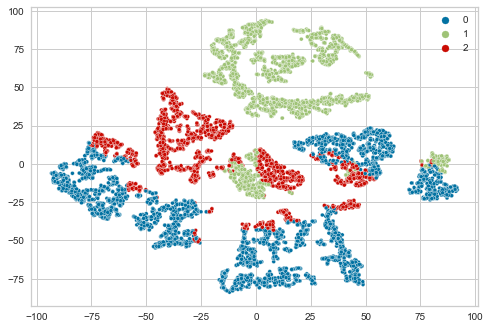

In [48]:
NoClasses = 3
rep_MeanShift_result(NoClasses)

Silhoutte Score: 0.33734328906402583


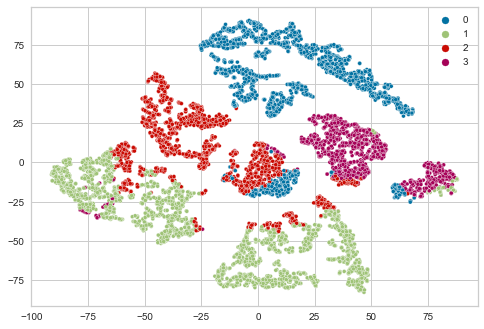

In [49]:
NoClasses = 4
rep_MeanShift_result(NoClasses)

Silhoutte Score: 0.3211290279140599


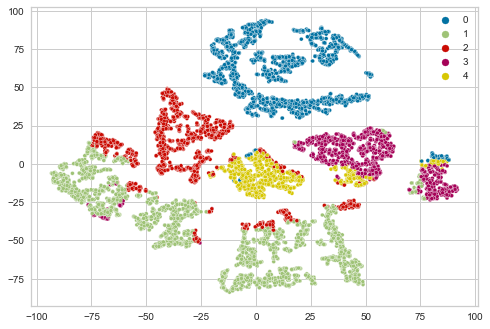

In [50]:
NoClasses = 5
rep_MeanShift_result(NoClasses)

## Conclusion and Final Results <a class="anchor" id="fourth-bullet"></a>

Based on the obtained results in the previous sections, it seems that the best number of clusters for our dataset is 4. Below, you can see the clusters obtaind by the Agglomerative Hierarchical Clustering again.   

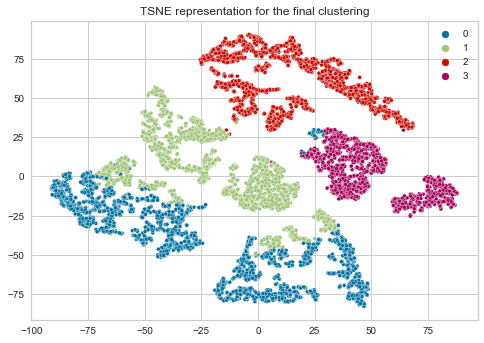

In [51]:
colors = sns.color_palette(n_colors=4)

pca = PCA(n_components=5, random_state=1979)
kern_pca = KernelPCA(n_components=6, n_jobs=-1, kernel='rbf')

labels, sil_score, agg_clus, data_sca_tra = agglomerative_clusterer(X=data, random_state=1979, 
                                                                    scaler=MaxAbsScaler(), trans=kern_pca)

tsne = TSNE(n_components=2, learning_rate='auto', random_state=58).fit_transform(data_sca_tra)
sns.scatterplot(tsne[:,0], tsne[:,1] , s=15, hue=labels, palette=colors)
plt.title('TSNE representation for the final clustering')
plt.show()


Let's have a look at the numbers of the samples in the four clusters.

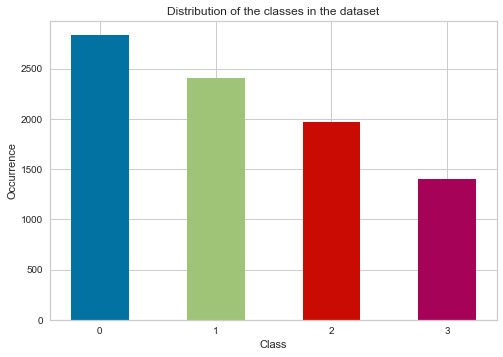

In [52]:
data_del_outliers['LABELS'] = labels
colors = sns.color_palette()

classes, frequencies = np.unique(labels, return_counts=True)
plt.bar(x=classes, height=frequencies, width=0.5, color=colors)
ax = plt.gca()
ax.set(xticks=[0,1,2,3], xlabel='Class', ylabel='Occurrence', title='Distribution of the classes in the dataset')
plt.show()

To have an insight on the features of each cluster, we have depicted the violin plot for the features in our dataset for the obtained clusters by the Agglomerative Hierarchical Clustering approach.

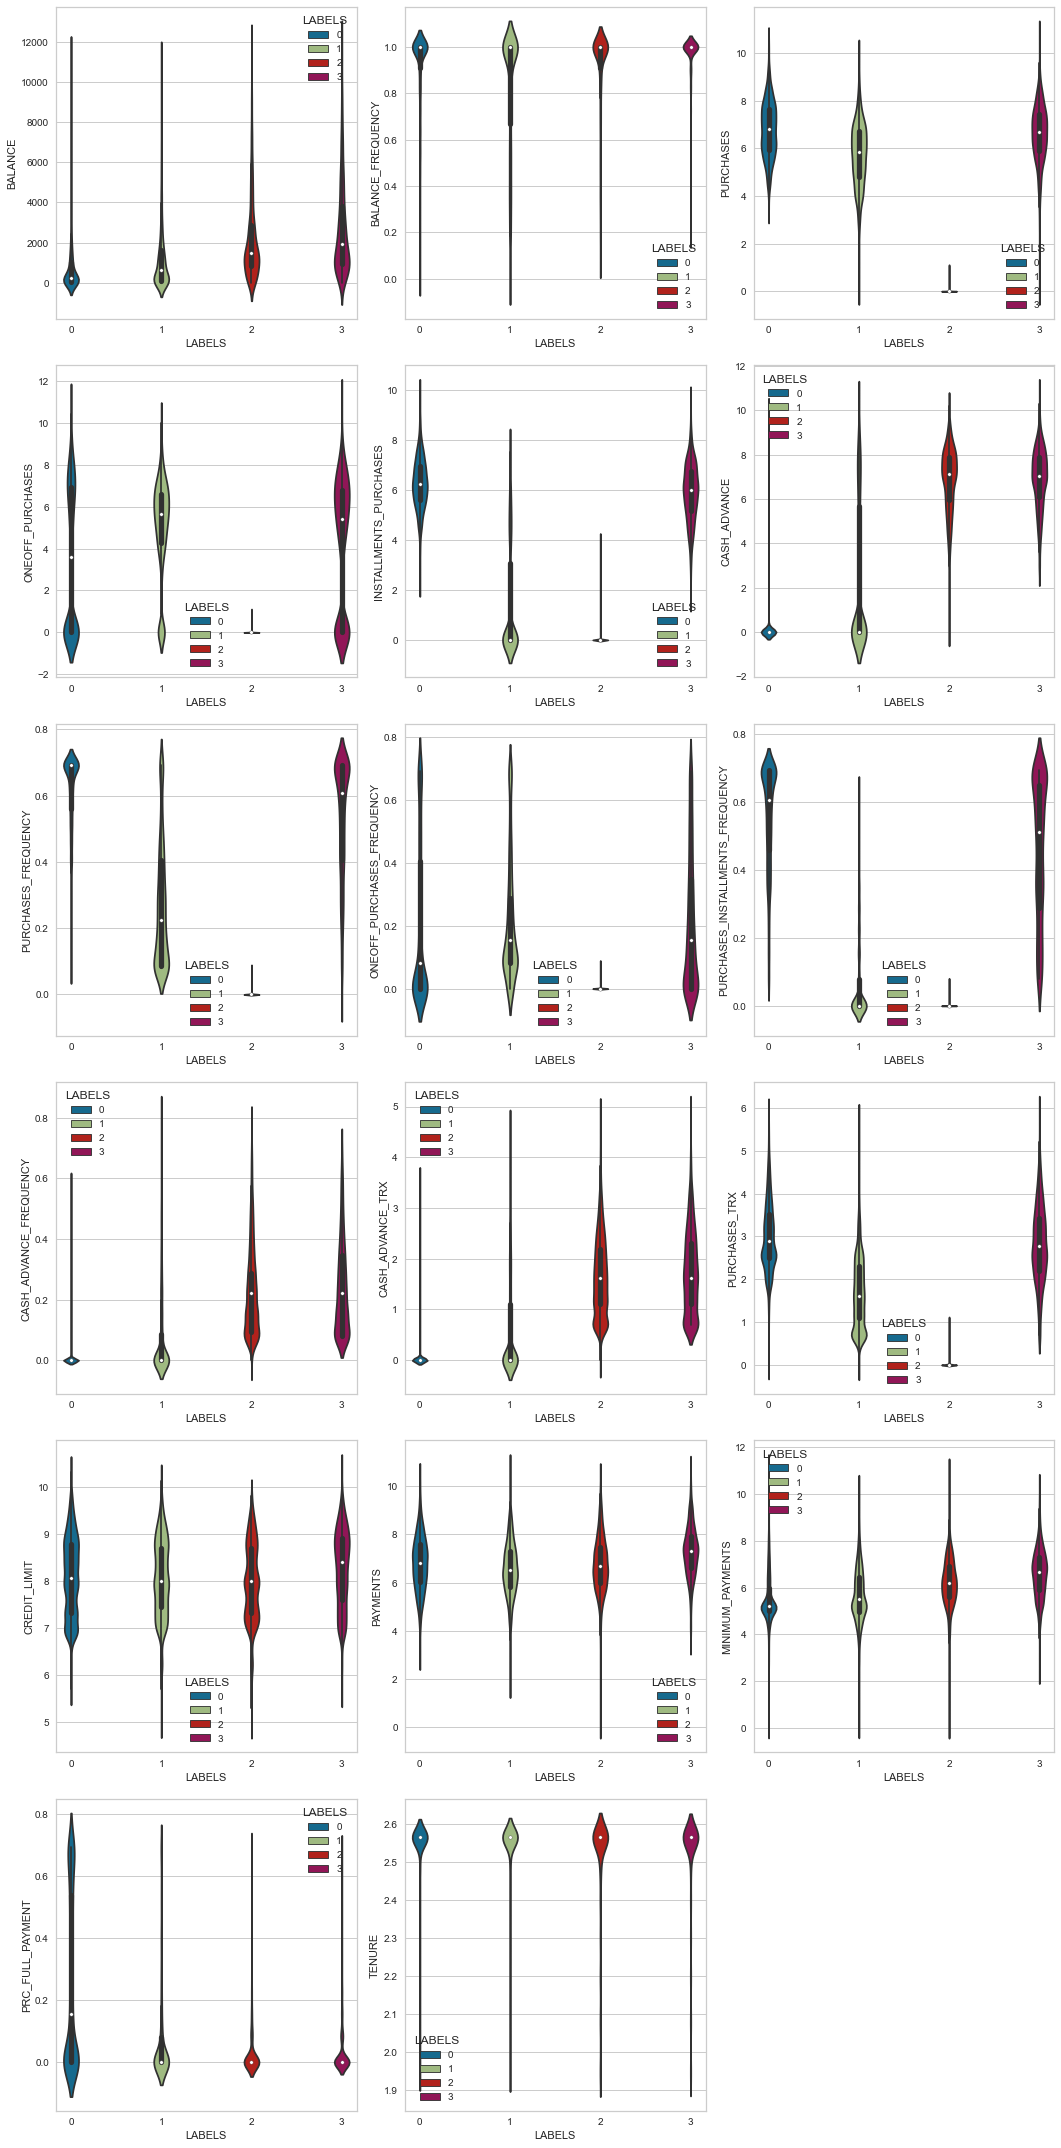

In [53]:
#data.groupby('LABELS').mean()
fig, axs = plt.subplots(6,3, figsize=(15,30))

for col, ax in zip(data_del_outliers.columns, axs.ravel()):
    
    if col != 'LABELS':
        sns.violinplot(data=data_del_outliers, x='LABELS', y=col , hue='LABELS', ax=ax)
        ax.set(xticks=[-0.3, 0.9, 2.1, 3.3], xticklabels=['0','1','2','3'])
    
    
plt.tight_layout()
axs[5,2].axis('off')
plt.show()

Based on the above violin plots, the four clusters can mainly be distinguished based on the following features:
- CASH_ADVANCE
- INSTALMENTS_PURCHASES

As it is revealed by the following plots:

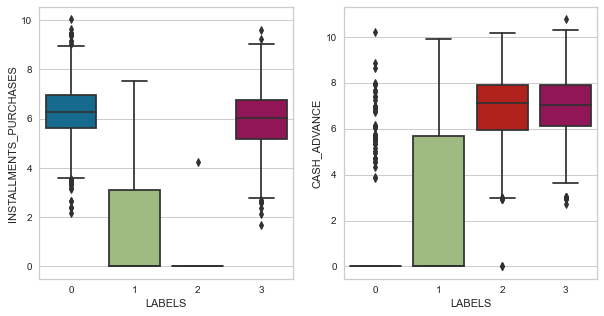

In [54]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=data_del_outliers, x='LABELS', y='INSTALLMENTS_PURCHASES', ax=axs[0])
sns.boxplot(data=data_del_outliers, x='LABELS', y='CASH_ADVANCE', ax=axs[1])
plt.show()

Therefore we can categorize our four classes as follows (H: High -  L: Low)





|Class | INSTALLMENTS_PURCHASES | CASH_ADVANCE |
|---|---|---|
|0 | H | L|
|1 | L | L|
|2 | L | H|
|3 | H | H|

However, note that the other feature should also be used when the class is not throughly distinguishable from the aforementioned features.

Now, let's have a look at some features which are mainly different between the classes. These features are as follows:
- PURCHASE_FREQUENCY
- BALANCE
-MINIMUM_PAYMENTS

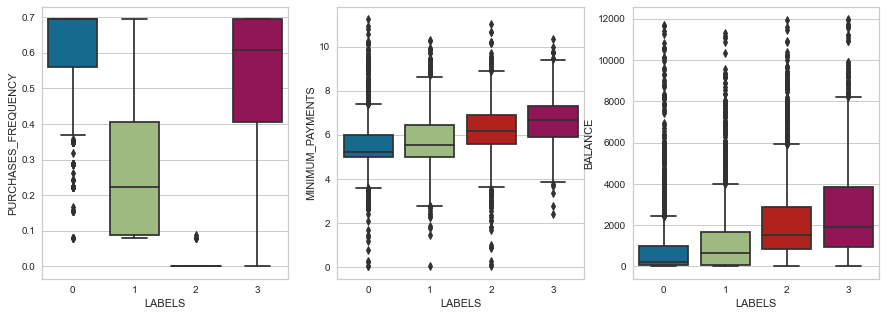

In [55]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=data_del_outliers, x='LABELS', y='PURCHASES_FREQUENCY', ax=axs[0])
sns.boxplot(data=data_del_outliers, x='LABELS', y='MINIMUM_PAYMENTS', ax=axs[1])
sns.boxplot(data=data_del_outliers, x='LABELS', y='BALANCE', ax=axs[2])
plt.show()

If we consider four grades for these features as follows:\
L: Low\
M: Medium\
U: Upper Medium\
H: High\
We have the following characteristics for our classes:





|Class | PURCHASES_FREQUENCY | MINIMUM_PAYMENTS | BALANCE |
|----|----|----|-----|
| 0  | H | L | L |
| 1  | M | M | M |
| 2  | L | U | U |
| 3  | H | H | H |

However, note that one may also consider some other features to identify the obtained classes.